In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib

In [4]:
df=pd.read_csv('green_tech_data.csv')
df.head

<bound method NDFrame.head of     carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0         181.089042     128.286267            0.642032         0.732568   
1         382.750007     672.769370            0.084140         2.891096   
2         306.197880     382.920383            0.161629         2.932858   
3         259.530469     557.713622            0.898554         3.368435   
4         104.606524     916.809827            0.606429         3.767411   
..               ...            ...                 ...              ...   
95        222.828459     414.288617            0.522243         4.688408   
96        232.956490     753.360111            0.769994         4.362857   
97        199.639356     907.399234            0.215821         2.430473   
98         58.896694     898.377782            0.622890         3.878920   
99         87.761999     801.887991            0.085347         3.895443   

    sustainability  
0                1  
1              

In [6]:
x=df[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y=df[['sustainability']]

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [8]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

C:\Users\sunda\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [9]:
y_pred=model1.predict(x_test)

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [11]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy of the model",accuracy)

Accuracy of the model 0.95


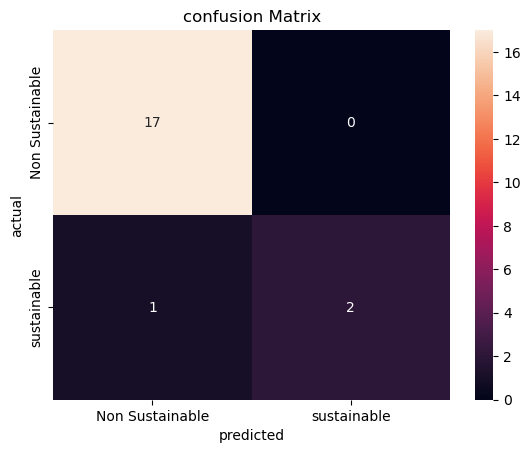

In [12]:
import seaborn as sns
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',color='blue',xticklabels=['Non Sustainable','sustainable'],yticklabels=['Non Sustainable','sustainable'])
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion Matrix')
plt.show()

In [13]:
print(classification_report(y_test,y_pred,target_names=['Non Sustainable','Sustainable']))

                 precision    recall  f1-score   support

Non Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [14]:
joblib.dump(model1,'logregmodel_sustainable.pkl')

['logregmodel_sustainable.pkl']